In [5]:
#Keras preloaded dataset
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

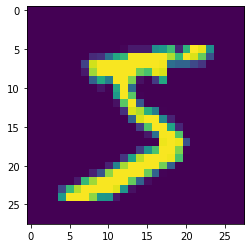

In [6]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [7]:
#check dataset shape
X_train.shape

(60000, 28, 28)

In [8]:
#check image shape
X_train[0].shape

(28, 28)

In [9]:
#reshape data to fit model
#The first number is the number of images (60,000 for X_train and 10,000 for X_test)
#Then comes the shape of each image (28x28). 
#The last number is 1, which signifies that the images are greyscale.
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
#We need to ‘one-hot-encode’ our target variable. 
#This means that a column will be created for each output category and a binary variable is inputted for each category.
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.

Our first 2 layers are Conv2D layers.

64 in the first layer and 32 in the second layer are the number of nodes in each layer. 

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

Activation is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. 

Our first layer also takes in an input shape. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.

‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

#Source: https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5



In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.8990 - accuracy: 0.9100 - val_loss: 0.0986 - val_accuracy: 0.9683
Epoch 2/3
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0630 - accuracy: 0.9809 - val_loss: 0.0815 - val_accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0805 - val_accuracy: 0.9767


In [16]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.18386129e-06, 1.08359745e-11, 1.55345842e-05, 1.93872547e-05,
        1.06496457e-10, 2.94337783e-11, 4.05327627e-14, 9.99962091e-01,
        1.32371781e-06, 5.19866433e-07],
       [1.65718700e-06, 4.09423365e-06, 9.99982357e-01, 1.41354473e-09,
        2.45465026e-09, 6.32375619e-09, 1.18916678e-05, 3.56831665e-12,
        2.66220290e-08, 3.22432769e-15],
       [3.60043600e-07, 9.99821842e-01, 4.60414952e-07, 1.19850851e-10,
        1.55227044e-05, 1.22260985e-06, 2.35425773e-07, 4.00571662e-05,
        1.20139019e-04, 2.92078170e-07],
       [9.99976516e-01, 7.65856649e-12, 8.12929648e-06, 2.97752426e-12,
        3.10396864e-09, 3.56995350e-10, 1.47305773e-05, 2.01825709e-10,
        1.04534948e-07, 5.25894734e-07]], dtype=float32)

In [17]:

#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)